## import

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import numpy as np
from scipy.stats import sem
from sklearn import metrics
import pandas as pd
target_names = ['non-patient', 'patient']

In [2]:
def CI(y_true, y_pred):
    n_bootstraps = 1000
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))

### Hubert ori

In [3]:
# fivefolds_hubert = pd.read_csv('hubert10k.csv')
# fivefolds_hubert['result'] = np.where(fivefolds_hubert['hyps'] >= 0.5,1,0)
# fivefolds_hubert_wrong = fivefolds_hubert.iloc[np.where(fivefolds_hubert['ifcorrect'] == False)]
# print(fivefolds_hubert_wrong)
# # print(fivefolds_hubert.head(20))
# fivefolds_hubert_result = fivefolds_hubert['result'].tolist()
# fivefolds_hubert_hyps = fivefolds_hubert['hyps'].tolist()
# fivefolds_hubert_truth = [int(i) for i in fivefolds_hubert['truth'].tolist()]
# print(classification_report(fivefolds_hubert_truth, fivefolds_hubert_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_hubert_truth, fivefolds_hubert_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_hubert_truth), np.array(fivefolds_hubert_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [4]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_encoder.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [5]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_decoder_hidden_0.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [6]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_decoder_hidden_10.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [7]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_decoder_hidden_20.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [8]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_decoder_hidden_30.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [9]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_decoder_hidden_31.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [10]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_decoder_hidden_32.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

## v1

### v1 decoder

In [11]:
# # with Lu & Taiwanese
# fivefolds_whisper15k_with_id_4 = pd.read_csv('whisper15k_with_id_4.csv')
# fivefolds_whisper15k_with_id_4['result'] = np.where(fivefolds_whisper15k_with_id_4['hyps'] >= 0.5,1,0)
# fivefolds_whisper15k_with_id_4_wrong = fivefolds_whisper15k_with_id_4.iloc[np.where(fivefolds_whisper15k_with_id_4['ifcorrect'] == False)]
# print(fivefolds_whisper15k_with_id_4_wrong)
# # print(fivefolds_whisper10k_with_id_2.head(20))
# fivefolds_whisper15k_with_id_4_result = fivefolds_whisper15k_with_id_4['result'].tolist()
# fivefolds_whisper15k_with_id_4_hyps = fivefolds_whisper15k_with_id_4['hyps'].tolist()
# fivefolds_whisper15k_with_id_4_truth = [int(i) for i in fivefolds_whisper15k_with_id_4['truth'].tolist()]
# print(classification_report(fivefolds_whisper15k_with_id_4_truth, fivefolds_whisper15k_with_id_4_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper15k_with_id_4_truth, fivefolds_whisper15k_with_id_4_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper15k_with_id_4_truth), np.array(fivefolds_whisper15k_with_id_4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper15k_with_id_4_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper15k_with_id_4_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [12]:
# # with Lu
# fivefolds_whisper15k_with_id_3 = pd.read_csv('whisper15k_with_id_3.csv')
# fivefolds_whisper15k_with_id_3['result'] = np.where(fivefolds_whisper15k_with_id_3['hyps'] >= 0.5,1,0)
# fivefolds_whisper15k_with_id_3_wrong = fivefolds_whisper15k_with_id_3.iloc[np.where(fivefolds_whisper15k_with_id_3['ifcorrect'] == False)]
# print(fivefolds_whisper15k_with_id_3_wrong)
# # print(fivefolds_whisper10k_with_id_2.head(20))
# fivefolds_whisper15k_with_id_3_result = fivefolds_whisper15k_with_id_3['result'].tolist()
# fivefolds_whisper15k_with_id_3_hyps = fivefolds_whisper15k_with_id_3['hyps'].tolist()
# fivefolds_whisper15k_with_id_3_truth = [int(i) for i in fivefolds_whisper15k_with_id_3['truth'].tolist()]
# print(classification_report(fivefolds_whisper15k_with_id_3_truth, fivefolds_whisper15k_with_id_3_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper15k_with_id_3_truth, fivefolds_whisper15k_with_id_3_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper15k_with_id_3_truth), np.array(fivefolds_whisper15k_with_id_3_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper15k_with_id_3_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper15k_with_id_3_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [13]:
# # with correct 5-fold-15
# fivefolds_whisper15k_with_id_2 = pd.read_csv('whisper15k_with_id_2.csv')
# fivefolds_whisper15k_with_id_2['result'] = np.where(fivefolds_whisper15k_with_id_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper15k_with_id_2_wrong = fivefolds_whisper15k_with_id_2.iloc[np.where(fivefolds_whisper15k_with_id_2['ifcorrect'] == False)]
# print(fivefolds_whisper15k_with_id_2_wrong)
# # print(fivefolds_whisper10k_with_id_2.head(20))
# fivefolds_whisper15k_with_id_2_result = fivefolds_whisper15k_with_id_2['result'].tolist()
# fivefolds_whisper15k_with_id_2_hyps = fivefolds_whisper15k_with_id_2['hyps'].tolist()
# fivefolds_whisper15k_with_id_2_truth = [int(i) for i in fivefolds_whisper15k_with_id_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper15k_with_id_2_truth, fivefolds_whisper15k_with_id_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper15k_with_id_2_truth, fivefolds_whisper15k_with_id_2_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper15k_with_id_2_truth), np.array(fivefolds_whisper15k_with_id_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper15k_with_id_2_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper15k_with_id_2_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### v1 ori

In [14]:
# # with correct 5-fold-10
# fivefolds_whisper10k_with_id_2 = pd.read_csv('whisper10k_with_id_2.csv')
# fivefolds_whisper10k_with_id_2['result'] = np.where(fivefolds_whisper10k_with_id_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_with_id_2_wrong = fivefolds_whisper10k_with_id_2.iloc[np.where(fivefolds_whisper10k_with_id_2['ifcorrect'] == False)]
# print(fivefolds_whisper10k_with_id_2_wrong)
# # print(fivefolds_whisper10k_with_id_2.head(20))
# fivefolds_whisper10k_with_id_2_result = fivefolds_whisper10k_with_id_2['result'].tolist()
# fivefolds_whisper10k_with_id_2_hyps = fivefolds_whisper10k_with_id_2['hyps'].tolist()
# fivefolds_whisper10k_with_id_2_truth = [int(i) for i in fivefolds_whisper10k_with_id_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_with_id_2_truth, fivefolds_whisper10k_with_id_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_with_id_2_truth, fivefolds_whisper10k_with_id_2_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_with_id_2_truth), np.array(fivefolds_whisper10k_with_id_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper10k_with_id_2_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper10k_with_id_2_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [15]:
# fivefolds_whisper10k_with_id = pd.read_csv('whisper10k_with_id.csv')
# fivefolds_whisper10k_with_id['result'] = np.where(fivefolds_whisper10k_with_id['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_with_id_wrong = fivefolds_whisper10k_with_id.iloc[np.where(fivefolds_whisper10k_with_id['ifcorrect'] == False)]
# print(fivefolds_whisper10k_with_id_wrong)
# # print(fivefolds_whisper10k_with_id.head(20))
# fivefolds_whisper10k_with_id_result = fivefolds_whisper10k_with_id['result'].tolist()
# fivefolds_whisper10k_with_id_hyps = fivefolds_whisper10k_with_id['hyps'].tolist()
# fivefolds_whisper10k_with_id_truth = [int(i) for i in fivefolds_whisper10k_with_id['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_with_id_truth, fivefolds_whisper10k_with_id_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_with_id_truth, fivefolds_whisper10k_with_id_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_with_id_truth), np.array(fivefolds_whisper10k_with_id_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper10k_with_id_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper10k_with_id_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [16]:
# fivefolds_whisper10k = pd.read_csv('whisper10k.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

## v2

### v2 encoder

                                name      hyps  truth  ifcorrect  result
1      data_process\CTT5-1-9\003.wav  0.525759    0.0      False       1
2      data_process\CTT5-1-9\004.wav  0.530323    0.0      False       1
8      data_process\CTT5-1-9\010.wav  0.560212    0.0      False       1
12   data_process\CTT5-1-9\19CTT.wav  0.758730    0.0      False       1
14   data_process\CTT5-1-9\23CTT.wav  0.909660    0.0      False       1
17   data_process\CTT5-1-9\33CTT.wav  0.847273    0.0      False       1
19   data_process\CTT5-1-9\35CTT.wav  0.263096    1.0      False       0
20   data_process\CTT5-1-9\40CTT.wav  0.486742    1.0      False       0
22   data_process\CTT5-1-9\51CTT.wav  0.603383    0.0      False       1
28   data_process\CTT5-1-9\85CTT.wav  0.670791    0.0      False       1
41   data_process\CTT5-2-9\11CTT.wav  0.387709    1.0      False       0
42   data_process\CTT5-2-9\25CTT.wav  0.365935    1.0      False       0
43   data_process\CTT5-2-9\27CTT.wav  0.383485    1

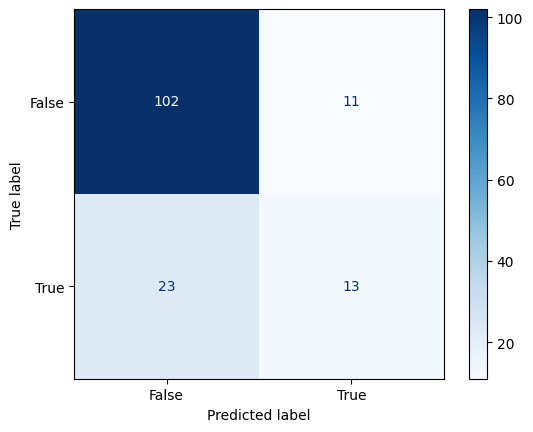

In [17]:
# with Lu & Taiwanese
fivefolds_whisper_WhisperForAudioClassification_v2_15k_3 = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_3.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
fivefolds_whisper_WhisperForAudioClassification_v2_15k_3['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3['hyps'] >= 0.5,1,0)
fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_wrong = fivefolds_whisper_WhisperForAudioClassification_v2_15k_3.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3['ifcorrect'] == False)]
print(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_result = fivefolds_whisper_WhisperForAudioClassification_v2_15k_3['result'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_hyps = fivefolds_whisper_WhisperForAudioClassification_v2_15k_3['hyps'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v2_15k_3['truth'].tolist()]
print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_truth]
y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

                               name      hyps  truth  ifcorrect  result
2   data_process\CTT5-1-2\19CTT.wav  0.758730    0.0      False       1
5   data_process\CTT5-1-2\33CTT.wav  0.847273    0.0      False       1
7   data_process\CTT5-1-2\35CTT.wav  0.263096    1.0      False       0
8   data_process\CTT5-1-2\40CTT.wav  0.486742    1.0      False       0
10  data_process\CTT5-1-2\51CTT.wav  0.603383    0.0      False       1
16  data_process\CTT5-1-2\85CTT.wav  0.670791    0.0      False       1
19  data_process\CTT5-2-2\11CTT.wav  0.387709    1.0      False       0
20  data_process\CTT5-2-2\25CTT.wav  0.365935    1.0      False       0
22  data_process\CTT5-2-2\37CTT.wav  0.250049    1.0      False       0
23  data_process\CTT5-2-2\39CTT.wav  0.195375    1.0      False       0
24  data_process\CTT5-2-2\45CTT.wav  0.084701    1.0      False       0
25  data_process\CTT5-2-2\46CTT.wav  0.241968    1.0      False       0
27  data_process\CTT5-2-2\67CTT.wav  0.333493    1.0      False 

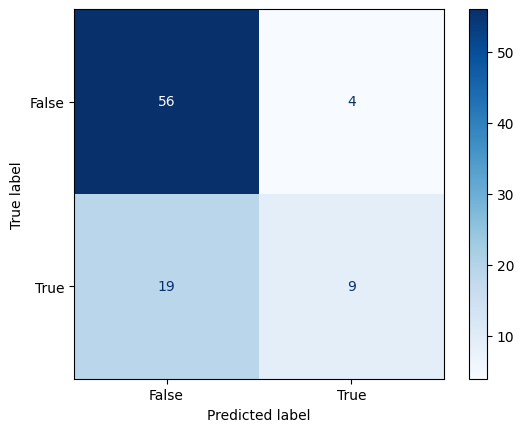

In [18]:
# with correct 5-fold-15
fivefolds_whisper_WhisperForAudioClassification_v2_15k_2 = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_2.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
fivefolds_whisper_WhisperForAudioClassification_v2_15k_2['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2['hyps'] >= 0.5,1,0)
fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_wrong = fivefolds_whisper_WhisperForAudioClassification_v2_15k_2.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2['ifcorrect'] == False)]
print(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_result = fivefolds_whisper_WhisperForAudioClassification_v2_15k_2['result'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps = fivefolds_whisper_WhisperForAudioClassification_v2_15k_2['hyps'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v2_15k_2['truth'].tolist()]
print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_result, target_names=target_names))

tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth[0:19]), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth[19:37]), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth[37:54]), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth[54:71]), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth[71:88]), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth]
y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [19]:
# # with means() 5-fold-15
# fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_with30separate.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
# fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['hyps'] >= 0.5,1,0)
# fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_wrong = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['ifcorrect'] == False)]
# print(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
# fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['result'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_hyps = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['hyps'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['truth'].tolist()]
# print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### v2 decoder

In [20]:
# # with correct 5-fold-15
# fivefolds_whisper_v2_15k_with_id_2 = pd.read_csv('whisper-v2-15k_with_id_2.csv')
# fivefolds_whisper_v2_15k_with_id_2['result'] = np.where(fivefolds_whisper_v2_15k_with_id_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v2_15k_with_id_2_wrong = fivefolds_whisper_v2_15k_with_id_2.iloc[np.where(fivefolds_whisper_v2_15k_with_id_2['ifcorrect'] == False)]
# print(fivefolds_whisper_v2_15k_with_id_2_wrong)
# # print(fivefolds_whisper_v3_10k_with_id_2.head(20))
# fivefolds_whisper_v2_15k_with_id_2_result = fivefolds_whisper_v2_15k_with_id_2['result'].tolist()
# fivefolds_whisper_v2_15k_with_id_2_hyps = fivefolds_whisper_v2_15k_with_id_2['hyps'].tolist()
# fivefolds_whisper_v2_15k_with_id_2_truth = [int(i) for i in fivefolds_whisper_v2_15k_with_id_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v2_15k_with_id_2_truth, fivefolds_whisper_v2_15k_with_id_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v2_15k_with_id_2_truth, fivefolds_whisper_v2_15k_with_id_2_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v2_15k_with_id_2_truth), np.array(fivefolds_whisper_v2_15k_with_id_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_v2_15k_with_id_2_result]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_v2_15k_with_id_2_truth]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### v2 ori

In [21]:
# # with correct 5-fold-10
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_2 = pd.read_csv('whisper-WhisperForAudioClassification-2-v2-10k.csv')
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_2['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_wrong = fivefolds_whisper_WhisperForAudioClassification_v2_10k_2.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2['ifcorrect'] == False)]
# print(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2.head(20))
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_result = fivefolds_whisper_WhisperForAudioClassification_v2_10k_2['result'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_hyps = fivefolds_whisper_WhisperForAudioClassification_v2_10k_2['hyps'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v2_10k_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_result]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_truth]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [22]:
# fivefolds_whisper_WhisperForAudioClassification_v2_10k = pd.read_csv('whisper-WhisperForAudioClassification-v2-10k.csv')
# fivefolds_whisper_WhisperForAudioClassification_v2_10k['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v2_10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_wrong = fivefolds_whisper_WhisperForAudioClassification_v2_10k.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v2_10k['ifcorrect'] == False)]
# print(fivefolds_whisper_WhisperForAudioClassification_v2_10k_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v2_10k.head(20))
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_result = fivefolds_whisper_WhisperForAudioClassification_v2_10k['result'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_hyps = fivefolds_whisper_WhisperForAudioClassification_v2_10k['hyps'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v2_10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v2_10k_truth, fivefolds_whisper_WhisperForAudioClassification_v2_10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v2_10k_truth, fivefolds_whisper_WhisperForAudioClassification_v2_10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_10k_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_10k_result]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_10k_truth]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [23]:
# # with correct 5-fold-10
# fivefolds_whisper_v2_10k_with_id_2 = pd.read_csv('whisper-v2-10k_with_id_2.csv')
# fivefolds_whisper_v2_10k_with_id_2['result'] = np.where(fivefolds_whisper_v2_10k_with_id_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v2_10k_with_id_2_wrong = fivefolds_whisper_v2_10k_with_id_2.iloc[np.where(fivefolds_whisper_v2_10k_with_id_2['ifcorrect'] == False)]
# print(fivefolds_whisper_v2_10k_with_id_2_wrong)
# # print(fivefolds_whisper_v2_10k_with_id_2.head(20))
# fivefolds_whisper_v2_10k_with_id_2_result = fivefolds_whisper_v2_10k_with_id_2['result'].tolist()
# fivefolds_whisper_v2_10k_with_id_2_hyps = fivefolds_whisper_v2_10k_with_id_2['hyps'].tolist()
# fivefolds_whisper_v2_10k_with_id_2_truth = [int(i) for i in fivefolds_whisper_v2_10k_with_id_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v2_10k_with_id_2_truth, fivefolds_whisper_v2_10k_with_id_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v2_10k_with_id_2_truth, fivefolds_whisper_v2_10k_with_id_2_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v2_10k_with_id_2_truth), np.array(fivefolds_whisper_v2_10k_with_id_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_v2_10k_with_id_2_result]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_v2_10k_with_id_2_truth]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [24]:
# fivefolds_whisper_v2_10k_with_id = pd.read_csv('whisper-v2-10k_with_id.csv')
# fivefolds_whisper_v2_10k_with_id['result'] = np.where(fivefolds_whisper_v2_10k_with_id['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v2_10k_with_id_wrong = fivefolds_whisper_v2_10k_with_id.iloc[np.where(fivefolds_whisper_v2_10k_with_id['ifcorrect'] == False)]
# print(fivefolds_whisper_v2_10k_with_id_wrong)
# # print(fivefolds_whisper_v2_10k_with_id.head(20))
# fivefolds_whisper_v2_10k_with_id_result = fivefolds_whisper_v2_10k_with_id['result'].tolist()
# fivefolds_whisper_v2_10k_with_id_hyps = fivefolds_whisper_v2_10k_with_id['hyps'].tolist()
# fivefolds_whisper_v2_10k_with_id_truth = [int(i) for i in fivefolds_whisper_v2_10k_with_id['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v2_10k_with_id_truth, fivefolds_whisper_v2_10k_with_id_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v2_10k_with_id_truth, fivefolds_whisper_v2_10k_with_id_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v2_10k_with_id_truth), np.array(fivefolds_whisper_v2_10k_with_id_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_v2_10k_with_id_result]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_v2_10k_with_id_truth]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [25]:
# fivefolds_whisper_v2_10k = pd.read_csv('whisper-v2-10k.csv')
# fivefolds_whisper_v2_10k['result'] = np.where(fivefolds_whisper_v2_10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v2_10k_wrong = fivefolds_whisper_v2_10k.iloc[np.where(fivefolds_whisper_v2_10k['ifcorrect'] == False)]
# print(fivefolds_whisper_v2_10k_wrong)
# # print(fivefolds_whisper_v2_10k.head(20))
# fivefolds_whisper_v2_10k_result = fivefolds_whisper_v2_10k['result'].tolist()
# fivefolds_whisper_v2_10k_hyps = fivefolds_whisper_v2_10k['hyps'].tolist()
# fivefolds_whisper_v2_10k_truth = [int(i) for i in fivefolds_whisper_v2_10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v2_10k_truth, fivefolds_whisper_v2_10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v2_10k_truth, fivefolds_whisper_v2_10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v2_10k_truth), np.array(fivefolds_whisper_v2_10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

## v3

### v3 encoder

                                name      hyps  truth  ifcorrect  result
2      data_process\CTT5-1-9\004.wav  0.524286    0.0      False       1
8      data_process\CTT5-1-9\010.wav  0.548921    0.0      False       1
12   data_process\CTT5-1-9\19CTT.wav  0.616771    0.0      False       1
14   data_process\CTT5-1-9\23CTT.wav  0.909558    0.0      False       1
17   data_process\CTT5-1-9\33CTT.wav  0.807344    0.0      False       1
19   data_process\CTT5-1-9\35CTT.wav  0.269027    1.0      False       0
20   data_process\CTT5-1-9\40CTT.wav  0.453501    1.0      False       0
22   data_process\CTT5-1-9\51CTT.wav  0.521434    0.0      False       1
23   data_process\CTT5-1-9\53CTT.wav  0.556264    0.0      False       1
28   data_process\CTT5-1-9\85CTT.wav  0.673020    0.0      False       1
46   data_process\CTT5-2-9\37CTT.wav  0.390992    1.0      False       0
47   data_process\CTT5-2-9\39CTT.wav  0.301379    1.0      False       0
48   data_process\CTT5-2-9\45CTT.wav  0.158306    1

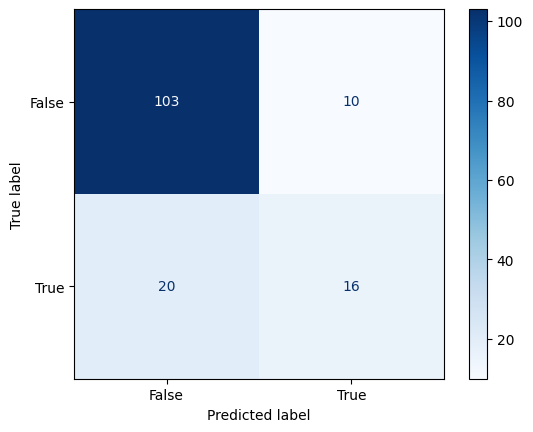

In [26]:
# with Lu & Taiwanese
fivefolds_whisper_WhisperForAudioClassification_v3_15k_3 = pd.read_csv('whisper-WhisperForAudioClassification-v3-15k_3.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
fivefolds_whisper_WhisperForAudioClassification_v3_15k_3['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3['hyps'] >= 0.5,1,0)
fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_wrong = fivefolds_whisper_WhisperForAudioClassification_v3_15k_3.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3['ifcorrect'] == False)]
print(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_result = fivefolds_whisper_WhisperForAudioClassification_v3_15k_3['result'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_hyps = fivefolds_whisper_WhisperForAudioClassification_v3_15k_3['hyps'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v3_15k_3['truth'].tolist()]
print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_truth]
y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

                               name      hyps  truth  ifcorrect  result
2   data_process\CTT5-1-2\19CTT.wav  0.616771    0.0      False       1
5   data_process\CTT5-1-2\33CTT.wav  0.807344    0.0      False       1
7   data_process\CTT5-1-2\35CTT.wav  0.269027    1.0      False       0
8   data_process\CTT5-1-2\40CTT.wav  0.453501    1.0      False       0
10  data_process\CTT5-1-2\51CTT.wav  0.521434    0.0      False       1
11  data_process\CTT5-1-2\53CTT.wav  0.556264    0.0      False       1
16  data_process\CTT5-1-2\85CTT.wav  0.673020    0.0      False       1
22  data_process\CTT5-2-2\37CTT.wav  0.390992    1.0      False       0
23  data_process\CTT5-2-2\39CTT.wav  0.301379    1.0      False       0
24  data_process\CTT5-2-2\45CTT.wav  0.158306    1.0      False       0
25  data_process\CTT5-2-2\46CTT.wav  0.264406    1.0      False       0
27  data_process\CTT5-2-2\67CTT.wav  0.367943    1.0      False       0
37  data_process\CTT5-3-2\18CTT.wav  0.203939    1.0      False 

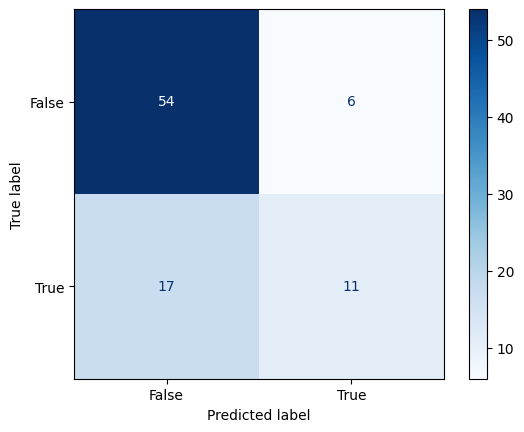

In [27]:
# with correct 5-fold-15
fivefolds_whisper_WhisperForAudioClassification_v3_15k_2 = pd.read_csv('whisper-WhisperForAudioClassification-v3-15k_2.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
fivefolds_whisper_WhisperForAudioClassification_v3_15k_2['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2['hyps'] >= 0.5,1,0)
fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_wrong = fivefolds_whisper_WhisperForAudioClassification_v3_15k_2.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2['ifcorrect'] == False)]
print(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_result = fivefolds_whisper_WhisperForAudioClassification_v3_15k_2['result'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps = fivefolds_whisper_WhisperForAudioClassification_v3_15k_2['hyps'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v3_15k_2['truth'].tolist()]
print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_result, target_names=target_names))

tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth[0:19]), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth[19:37]), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth[37:54]), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth[54:71]), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth[71:88]), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth]
y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [28]:
# # with means() 5-fold-15
# fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate = pd.read_csv('whisper-WhisperForAudioClassification-v3-15k_with30separate.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
# fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['hyps'] >= 0.5,1,0)
# fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_wrong = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['ifcorrect'] == False)]
# print(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
# fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['result'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_hyps = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['hyps'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['truth'].tolist()]
# print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### v3 decoder

In [29]:
# # with correct 5-fold-15
# fivefolds_whisper_v3_15k_with_id_2 = pd.read_csv('whisper-v3-15k_with_id_2.csv')
# fivefolds_whisper_v3_15k_with_id_2['result'] = np.where(fivefolds_whisper_v3_15k_with_id_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v3_15k_with_id_2_wrong = fivefolds_whisper_v3_15k_with_id_2.iloc[np.where(fivefolds_whisper_v3_15k_with_id_2['ifcorrect'] == False)]
# print(fivefolds_whisper_v3_15k_with_id_2_wrong)
# # print(fivefolds_whisper_v3_10k_with_id_2.head(20))
# fivefolds_whisper_v3_15k_with_id_2_result = fivefolds_whisper_v3_15k_with_id_2['result'].tolist()
# fivefolds_whisper_v3_15k_with_id_2_hyps = fivefolds_whisper_v3_15k_with_id_2['hyps'].tolist()
# fivefolds_whisper_v3_15k_with_id_2_truth = [int(i) for i in fivefolds_whisper_v3_15k_with_id_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v3_15k_with_id_2_truth, fivefolds_whisper_v3_15k_with_id_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v3_15k_with_id_2_truth, fivefolds_whisper_v3_15k_with_id_2_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v3_15k_with_id_2_truth), np.array(fivefolds_whisper_v3_15k_with_id_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_v3_15k_with_id_2_result]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_v3_15k_with_id_2_truth]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### v3 ori

In [30]:
# # with correct 5-fold-10
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_2 = pd.read_csv('whisper-WhisperForAudioClassification-2-v3-10k.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_2['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_wrong = fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2['ifcorrect'] == False)]
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_result = fivefolds_whisper_WhisperForAudioClassification_v3_10k_2['result'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_hyps = fivefolds_whisper_WhisperForAudioClassification_v3_10k_2['hyps'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v3_10k_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_result]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_truth]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [31]:
# fivefolds_whisper_WhisperForAudioClassification_v3_10k = pd.read_csv('whisper-WhisperForAudioClassification-v3-10k.csv')
# fivefolds_whisper_WhisperForAudioClassification_v3_10k['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v3_10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_wrong = fivefolds_whisper_WhisperForAudioClassification_v3_10k.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v3_10k['ifcorrect'] == False)]
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v3_10k.head(20))
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_result = fivefolds_whisper_WhisperForAudioClassification_v3_10k['result'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_hyps = fivefolds_whisper_WhisperForAudioClassification_v3_10k['hyps'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v3_10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v3_10k_truth, fivefolds_whisper_WhisperForAudioClassification_v3_10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v3_10k_truth, fivefolds_whisper_WhisperForAudioClassification_v3_10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_10k_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_10k_result]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_10k_truth]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [32]:
# # with correct 5-fold-10
# fivefolds_whisper_v3_10k_with_id_2 = pd.read_csv('whisper-v3-10k_with_id_2.csv')
# fivefolds_whisper_v3_10k_with_id_2['result'] = np.where(fivefolds_whisper_v3_10k_with_id_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v3_10k_with_id_2_wrong = fivefolds_whisper_v3_10k_with_id_2.iloc[np.where(fivefolds_whisper_v3_10k_with_id_2['ifcorrect'] == False)]
# print(fivefolds_whisper_v3_10k_with_id_2_wrong)
# # print(fivefolds_whisper_v3_10k_with_id_2.head(20))
# fivefolds_whisper_v3_10k_with_id_2_result = fivefolds_whisper_v3_10k_with_id_2['result'].tolist()
# fivefolds_whisper_v3_10k_with_id_2_hyps = fivefolds_whisper_v3_10k_with_id_2['hyps'].tolist()
# fivefolds_whisper_v3_10k_with_id_2_truth = [int(i) for i in fivefolds_whisper_v3_10k_with_id_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v3_10k_with_id_2_truth, fivefolds_whisper_v3_10k_with_id_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v3_10k_with_id_2_truth, fivefolds_whisper_v3_10k_with_id_2_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v3_10k_with_id_2_truth), np.array(fivefolds_whisper_v3_10k_with_id_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_v3_10k_with_id_2_result]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_v3_10k_with_id_2_truth]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [33]:
# fivefolds_whisper_v3_10k_with_id = pd.read_csv('whisper-v3-10k_with_id.csv')
# fivefolds_whisper_v3_10k_with_id['result'] = np.where(fivefolds_whisper_v3_10k_with_id['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v3_10k_with_id_wrong = fivefolds_whisper_v3_10k_with_id.iloc[np.where(fivefolds_whisper_v3_10k_with_id['ifcorrect'] == False)]
# print(fivefolds_whisper_v3_10k_with_id_wrong)
# # print(fivefolds_whisper_v3_10k_with_id.head(20))
# fivefolds_whisper_v3_10k_with_id_result = fivefolds_whisper_v3_10k_with_id['result'].tolist()
# fivefolds_whisper_v3_10k_with_id_hyps = fivefolds_whisper_v3_10k_with_id['hyps'].tolist()
# fivefolds_whisper_v3_10k_with_id_truth = [int(i) for i in fivefolds_whisper_v3_10k_with_id['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v3_10k_with_id_truth, fivefolds_whisper_v3_10k_with_id_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v3_10k_with_id_truth, fivefolds_whisper_v3_10k_with_id_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v3_10k_with_id_truth), np.array(fivefolds_whisper_v3_10k_with_id_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_v3_10k_with_id_result]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_v3_10k_with_id_truth]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [34]:
# fivefolds_whisper_v3_10k = pd.read_csv('whisper-v3-10k.csv')
# fivefolds_whisper_v3_10k['result'] = np.where(fivefolds_whisper_v3_10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v3_10k_wrong = fivefolds_whisper_v3_10k.iloc[np.where(fivefolds_whisper_v3_10k['ifcorrect'] == False)]
# print(fivefolds_whisper_v3_10k_wrong)
# # print(fivefolds_whisper_v3_10k.head(20))
# fivefolds_whisper_v3_10k_result = fivefolds_whisper_v3_10k['result'].tolist()
# fivefolds_whisper_v3_10k_hyps = fivefolds_whisper_v3_10k['hyps'].tolist()
# fivefolds_whisper_v3_10k_truth = [int(i) for i in fivefolds_whisper_v3_10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v3_10k_truth, fivefolds_whisper_v3_10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v3_10k_truth, fivefolds_whisper_v3_10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v3_10k_truth), np.array(fivefolds_whisper_v3_10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [35]:
# fivefolds_with30_10k = pd.read_csv('whisper-with30-10k.csv')
# fivefolds_with30_10k['result'] = np.where(fivefolds_with30_10k['hyps'] >= 0.5,1,0)
# fivefolds_with30_10k_wrong = fivefolds_with30_10k.iloc[np.where(fivefolds_with30_10k['ifcorrect'] == False)]
# print(fivefolds_with30_10k_wrong)
# # print(fivefolds_with30_10k.head(20))
# fivefolds_with30_10k_result = fivefolds_with30_10k['result'].tolist()
# fivefolds_with30_10k_hyps = fivefolds_with30_10k['hyps'].tolist()
# fivefolds_with30_10k_truth = [int(i) for i in fivefolds_with30_10k['truth'].tolist()]
# print(classification_report(fivefolds_with30_10k_truth, fivefolds_with30_10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_with30_10k_truth, fivefolds_with30_10k_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with30_10k_truth), np.array(fivefolds_with30_10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [36]:
# fivefolds_with30separate0_10k = pd.read_csv('whisper-with30separate0-10k.csv')
# fivefolds_with30separate0_10k['result'] = np.where(fivefolds_with30separate0_10k['hyps'] >= 0.5,1,0)
# fivefolds_with30separate0_wrong = fivefolds_with30separate0_10k.iloc[np.where(fivefolds_with30separate0_10k['ifcorrect'] == False)]
# print(fivefolds_with30separate0_wrong)
# # print(fivefolds_with30separate0_10k.head(20))
# fivefolds_with30separate0_result = fivefolds_with30separate0_10k['result'].tolist()
# fivefolds_with30separate0_hyps = fivefolds_with30separate0_10k['hyps'].tolist()
# fivefolds_with30separate0_truth = [int(i) for i in fivefolds_with30separate0_10k['truth'].tolist()]
# print(classification_report(fivefolds_with30separate0_truth, fivefolds_with30separate0_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_with30separate0_truth, fivefolds_with30separate0_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with30separate0_truth), np.array(fivefolds_with30separate0_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [37]:
# fivefolds_with30separate_10k = pd.read_csv('whisper-with30separate-10k.csv')
# fivefolds_with30separate_10k['result'] = np.where(fivefolds_with30separate_10k['hyps'] >= 0.5,1,0)
# fivefolds_with30separate_wrong = fivefolds_with30separate_10k.iloc[np.where(fivefolds_with30separate_10k['ifcorrect'] == False)]
# print(fivefolds_with30separate_wrong)
# # print(fivefolds_with30separate_10k.head(20))
# fivefolds_with30separate_result = fivefolds_with30separate_10k['result'].tolist()
# fivefolds_with30separate_hyps = fivefolds_with30separate_10k['hyps'].tolist()
# fivefolds_with30separate_truth = [int(i) for i in fivefolds_with30separate_10k['truth'].tolist()]
# print(classification_report(fivefolds_with30separate_truth, fivefolds_with30separate_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_with30separate_truth, fivefolds_with30separate_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with30separate_truth), np.array(fivefolds_with30separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [38]:
# fivefolds_with30separate_10k = pd.read_csv('whisper-with30separate-10k.csv')
# result = np.where(fivefolds_with30separate_10k['hyps'] >= 0.5,1,0)
# name = fivefolds_with30separate_10k['name'].values.tolist()
# truth = fivefolds_with30separate_10k['truth'].values.tolist()
# allresult = np.full([100, 7], np.nan)
# major = np.zeros([100, 3])
# majorvote = np.zeros([100, 3])
# correct = 0

# for i in range(len(name)):
#     file = int(name[i].split('\\')[-1].split('C')[0])
#     idx = int(name[i].split('\\')[-1].split('_')[1])
#     allresult[file-1][0] = file
#     allresult[file-1][idx] = result[i]
#     major[file-1][int(result[i])] += 1
#     major[file-1][2] = truth[i]

# for i in range(len(major)):
#     if(i != 23 and i != 26 and i != 27 and i != 36 and i != 41 and i != 48 and i != 49 and i != 59 and i != 60 and i != 61 and i != 62 and i != 66):
#         majorvote[i][0] = i+1
#         majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
#         majorvote[i][2] = major[i][2]
#         if(majorvote[i][1] == majorvote[i][2]): 
#             correct += 1

# print(correct, 88, correct/88)
# allresult_df = pd.DataFrame(allresult)
# allresult_df.to_csv(f'whisper-with30separate_allresult.csv', index=False) 

In [39]:
# fivefolds_with2separate_10k = pd.read_csv('whisper-with2separate-10k.csv')
# fivefolds_with2separate_10k['result'] = np.where(fivefolds_with2separate_10k['hyps'] >= 0.5,1,0)
# fivefolds_with2separate_wrong = fivefolds_with2separate_10k.iloc[np.where(fivefolds_with2separate_10k['ifcorrect'] == False)]
# print(fivefolds_with2separate_wrong)
# # print(fivefolds_with2separate_10k.head(20))
# fivefolds_with2separate_result = fivefolds_with2separate_10k['result'].tolist()
# fivefolds_with2separate_hyps = fivefolds_with2separate_10k['hyps'].tolist()
# fivefolds_with2separate_truth = [int(i) for i in fivefolds_with2separate_10k['truth'].tolist()]
# print(classification_report(fivefolds_with2separate_truth, fivefolds_with2separate_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_with2separate_truth, fivefolds_with2separate_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with2separate_truth), np.array(fivefolds_with2separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [40]:
# fivefolds_with2separate_10k = pd.read_csv('whisper-with2separate-10k.csv')
# result = np.where(fivefolds_with2separate_10k['hyps'] >= 0.5,1,0)
# name = fivefolds_with2separate_10k['name'].values.tolist()
# truth = fivefolds_with2separate_10k['truth'].values.tolist()
# allresult = np.full([100, 105], np.nan)
# major = np.zeros([100, 3])
# majorvote = np.zeros([100, 3])
# correct = 0

# for i in range(len(name)):
#     file = int(name[i].split('\\')[-1].split('C')[0])
#     idx = int(name[i].split('\\')[-1].split('_')[1])
#     allresult[file-1][0] = file
#     allresult[file-1][idx] = result[i]
#     major[file-1][int(result[i])] += 1
#     major[file-1][2] = truth[i]

# for i in range(len(major)):
#     if(i != 23 and i != 26 and i != 27 and i != 36 and i != 41 and i != 48 and i != 49 and i != 59 and i != 60 and i != 61 and i != 62 and i != 66):
#         majorvote[i][0] = i+1
#         majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
#         majorvote[i][2] = major[i][2]
#         if(majorvote[i][1] == majorvote[i][2]): 
#             correct += 1

# print(correct, 88, correct/88)
# allresult_df = pd.DataFrame(allresult)
# allresult_df.to_csv(f'whisper-with2separate_allresult.csv', index=False) 

In [41]:
# fivefolds_with10separate_10k = pd.read_csv('whisper-with10separate-10k.csv')
# fivefolds_with10separate_10k['result'] = np.where(fivefolds_with10separate_10k['hyps'] >= 0.5,1,0)
# fivefolds_with10separate_wrong = fivefolds_with10separate_10k.iloc[np.where(fivefolds_with10separate_10k['ifcorrect'] == False)]
# print(fivefolds_with10separate_wrong)
# # print(fivefolds_with10separate_10k.head(20))
# fivefolds_with10separate_result = fivefolds_with10separate_10k['result'].tolist()
# fivefolds_with10separate_hyps = fivefolds_with10separate_10k['hyps'].tolist()
# fivefolds_with10separate_truth = [int(i) for i in fivefolds_with10separate_10k['truth'].tolist()]
# print(classification_report(fivefolds_with10separate_truth, fivefolds_with10separate_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_with10separate_truth, fivefolds_with10separate_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with10separate_truth), np.array(fivefolds_with10separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

### segment

In [42]:
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_with30separate.csv')
result = np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['hyps'] >= 0.5,1,0)
name = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['name'].values.tolist()
truth = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['truth'].values.tolist()
allresult = np.full([100, 105], np.nan)
major = np.zeros([100, 3])
majorvote = np.zeros([100, 3])
correct = 0

for i in range(len(name)):
    file = int(name[i].split('\\')[-1].split('C')[0])
    idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    allresult[file-1][0] = file
    allresult[file-1][idx] = result[i]
    major[file-1][int(result[i])] += 1
    major[file-1][2] = truth[i]

for i in range(len(major)):
    if(i != 23 and i != 26 and i != 27 and i != 36 and i != 41 and i != 48 and i != 49 and i != 59 and i != 60 and i != 61 and i != 62 and i != 66):
        majorvote[i][0] = i+1
        majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
        majorvote[i][2] = major[i][2]
        if(majorvote[i][1] == majorvote[i][2]): 
            correct += 1

print(correct, 88, correct/88)
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_allresult_df = pd.DataFrame(allresult)
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_allresult_df.to_csv(f'whisper-with10separate_allresult.csv', index=False) 
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth'])
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df.drop(['name'], axis=1)
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df.drop([22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df

65 88 0.7386363636363636


,result,truth
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
95,0.0,0.0
96,0.0,0.0
97,0.0,0.0
98,0.0,0.0


    result  truth
3      0.0    1.0
4      0.0    1.0
8      0.0    1.0
9      0.0    1.0
10     0.0    1.0
11     0.0    1.0
17     0.0    1.0
18     1.0    0.0
19     0.0    1.0
24     0.0    1.0
30     0.0    1.0
31     0.0    1.0
32     1.0    0.0
34     0.0    1.0
37     0.0    1.0
38     0.0    1.0
44     0.0    1.0
45     0.0    1.0
50     1.0    0.0
56     0.0    1.0
57     0.0    1.0
64     0.0    1.0
84     1.0    0.0
              precision    recall  f1-score   support

 non-patient       0.76      0.94      0.84        65
     patient       0.50      0.17      0.26        23

    accuracy                           0.74        88
   macro avg       0.63      0.56      0.55        88
weighted avg       0.69      0.74      0.69        88

sensitivuty:  0.17391304347826086
specificity:  0.9384615384615385


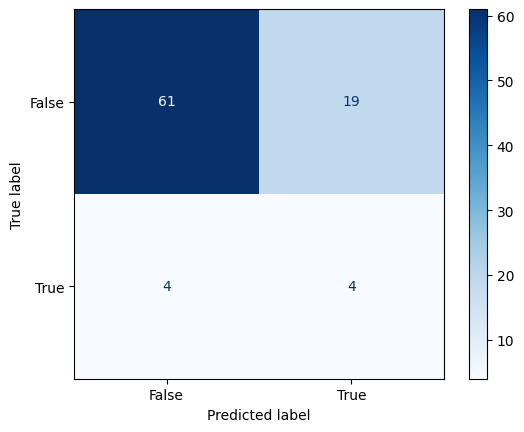

In [43]:
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df['result']
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df['truth']
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_wrong = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df['result'] != fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df['truth'])]
print(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_wrong)
clf_report  = classification_report(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with10separate_truth), np.array(fivefolds_with10separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result]
y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [44]:
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate = pd.read_csv('whisper-WhisperForAudioClassification-v3-15k_with30separate.csv')
result = np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['hyps'] >= 0.5,1,0)
name = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['name'].values.tolist()
truth = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['truth'].values.tolist()
allresult = np.full([100, 105], np.nan)
major = np.zeros([100, 3])
majorvote = np.zeros([100, 3])
correct = 0

for i in range(len(name)):
    file = int(name[i].split('\\')[-1].split('C')[0])
    idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    allresult[file-1][0] = file
    allresult[file-1][idx] = result[i]
    major[file-1][int(result[i])] += 1
    major[file-1][2] = truth[i]

for i in range(len(major)):
    if(i != 23 and i != 26 and i != 27 and i != 36 and i != 41 and i != 48 and i != 49 and i != 59 and i != 60 and i != 61 and i != 62 and i != 66):
        majorvote[i][0] = i+1
        majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
        majorvote[i][2] = major[i][2]
        if(majorvote[i][1] == majorvote[i][2]): 
            correct += 1

print(correct, 88, correct/88)
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_allresult_df = pd.DataFrame(allresult)
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_allresult_df.to_csv(f'whisper-with10separate_allresult.csv', index=False) 
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth'])
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df.drop(['name'], axis=1)
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df.drop([22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df

67 88 0.7613636363636364


,result,truth
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
95,0.0,0.0
96,0.0,0.0
97,0.0,0.0
98,0.0,0.0


    result  truth
3      0.0    1.0
4      0.0    1.0
8      0.0    1.0
9      0.0    1.0
11     0.0    1.0
17     0.0    1.0
19     0.0    1.0
24     0.0    1.0
30     0.0    1.0
31     0.0    1.0
32     1.0    0.0
34     0.0    1.0
37     0.0    1.0
38     0.0    1.0
44     0.0    1.0
45     0.0    1.0
50     1.0    0.0
56     0.0    1.0
63     0.0    1.0
64     0.0    1.0
84     1.0    0.0
              precision    recall  f1-score   support

 non-patient       0.78      0.95      0.86        65
     patient       0.62      0.22      0.32        23

    accuracy                           0.76        88
   macro avg       0.70      0.59      0.59        88
weighted avg       0.74      0.76      0.72        88

sensitivuty:  0.21739130434782608
specificity:  0.9538461538461539


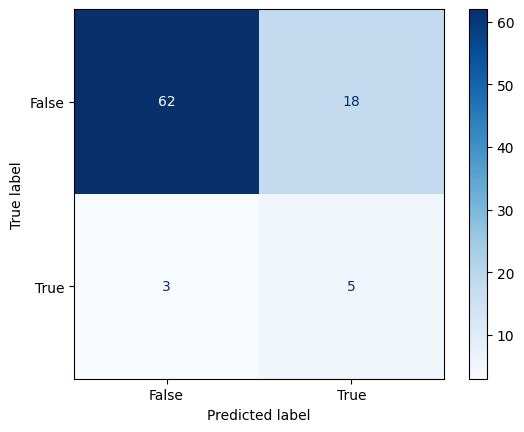

In [45]:
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df['result']
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df['truth']
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_wrong = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df['result'] != fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df['truth'])]
print(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_wrong)
clf_report  = classification_report(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with10separate_truth), np.array(fivefolds_with10separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result]
y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

## BERT

    name      hyps  truth  ifcorrect  result
0     15  0.781967    0.0      False       1
2     19  0.928337    0.0      False       1
5     33  0.975243    0.0      False       1
7     35  0.127843    1.0      False       0
10    51  0.971446    0.0      False       1
45    52  0.716365    0.0      False       1
46    57  0.215304    1.0      False       0
47    58  0.339317    1.0      False       0
66    88  0.639507    0.0      False       1
79     5  0.475549    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.93      0.90      0.92        60
     patient       0.80      0.86      0.83        28

    accuracy                           0.89        88
   macro avg       0.87      0.88      0.87        88
weighted avg       0.89      0.89      0.89        88

sensitivuty:  0.8571428571428571
specificity:  0.9
AUC:  0.9273809523809524


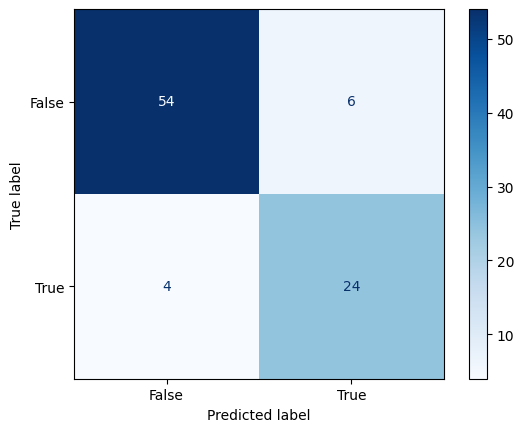

In [46]:
# with bert-v1-mean4
fivefolds_bert_v1_15k_mean4 = pd.read_csv('bert-v1-15k-mean4.csv')
fivefolds_bert_v1_15k_mean4['result'] = np.where(fivefolds_bert_v1_15k_mean4['hyps'] >= 0.5,1,0)
fivefolds_bert_v1_15k_mean4_wrong = fivefolds_bert_v1_15k_mean4.iloc[np.where(fivefolds_bert_v1_15k_mean4['ifcorrect'] == False)]
print(fivefolds_bert_v1_15k_mean4_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v1_15k_mean4_result = fivefolds_bert_v1_15k_mean4['result'].tolist()
fivefolds_bert_v1_15k_mean4_hyps = fivefolds_bert_v1_15k_mean4['hyps'].tolist()
fivefolds_bert_v1_15k_mean4_truth = [int(i) for i in fivefolds_bert_v1_15k_mean4['truth'].tolist()]
print(classification_report(fivefolds_bert_v1_15k_mean4_truth, fivefolds_bert_v1_15k_mean4_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v1_15k_mean4_truth, fivefolds_bert_v1_15k_mean4_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v1_15k_mean4_truth), np.array(fivefolds_bert_v1_15k_mean4_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_bert_v1_15k_mean4_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v1_15k_mean4_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.836835    0.0      False       1
2     19  0.911414    0.0      False       1
3     22  0.553730    0.0      False       1
5     33  0.886240    0.0      False       1
7     35  0.244581    1.0      False       0
8     40  0.117117    1.0      False       0
10    51  0.962716    0.0      False       1
16    85  0.573864    0.0      False       1
46    57  0.189223    1.0      False       0
47    58  0.402021    1.0      False       0
66    88  0.645291    0.0      False       1
79     5  0.495774    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.91      0.88      0.90        60
     patient       0.77      0.82      0.79        28

    accuracy                           0.86        88
   macro avg       0.84      0.85      0.85        88
weighted avg       0.87      0.86      0.86        88

sensitivuty:  0.8214285714285714
specificity:  0.8833333333333333
AUC:  0.93154761904761

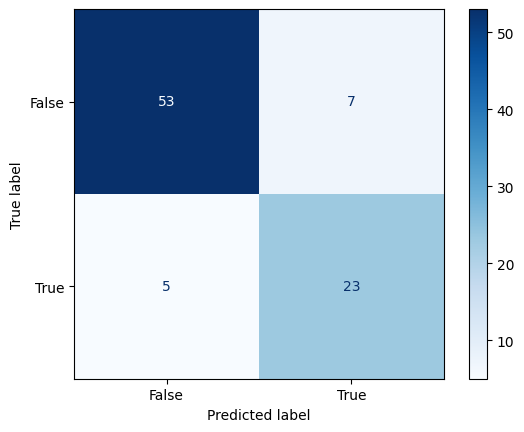

In [47]:
# with bert-v1
fivefolds_bert_v1_15k = pd.read_csv('bert-v1-15k.csv')
fivefolds_bert_v1_15k['result'] = np.where(fivefolds_bert_v1_15k['hyps'] >= 0.5,1,0)
fivefolds_bert_v1_15k_wrong = fivefolds_bert_v1_15k.iloc[np.where(fivefolds_bert_v1_15k['ifcorrect'] == False)]
print(fivefolds_bert_v1_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v1_15k_result = fivefolds_bert_v1_15k['result'].tolist()
fivefolds_bert_v1_15k_hyps = fivefolds_bert_v1_15k['hyps'].tolist()
fivefolds_bert_v1_15k_truth = [int(i) for i in fivefolds_bert_v1_15k['truth'].tolist()]
print(classification_report(fivefolds_bert_v1_15k_truth, fivefolds_bert_v1_15k_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v1_15k_truth, fivefolds_bert_v1_15k_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v1_15k_truth), np.array(fivefolds_bert_v1_15k_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_bert_v1_15k_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v1_15k_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.780101    0.0      False       1
2     19  0.903586    0.0      False       1
5     33  0.977081    0.0      False       1
7     35  0.109072    1.0      False       0
10    51  0.871969    0.0      False       1
41    32  0.478169    1.0      False       0
42    38  0.416315    1.0      False       0
45    52  0.734434    0.0      False       1
46    57  0.084279    1.0      False       0
47    58  0.483975    1.0      False       0
71    10  0.450581    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.90      0.92      0.91        60
     patient       0.81      0.79      0.80        28

    accuracy                           0.88        88
   macro avg       0.86      0.85      0.85        88
weighted avg       0.87      0.88      0.87        88

sensitivuty:  0.7857142857142857
specificity:  0.9166666666666666
AUC:  0.7333333333333334 1.0 0.8333333333333333 1.0 1.0
AUC_avg:  0

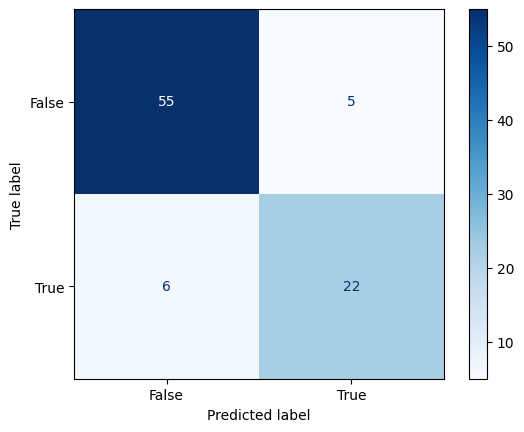

In [48]:
# with bert-v2-mean4
fivefolds_bert_v2_15k_mean4 = pd.read_csv('bert-v2-15k-mean4.csv')
fivefolds_bert_v2_15k_mean4['result'] = np.where(fivefolds_bert_v2_15k_mean4['hyps'] >= 0.5,1,0)
fivefolds_bert_v2_15k_mean4_wrong = fivefolds_bert_v2_15k_mean4.iloc[np.where(fivefolds_bert_v2_15k_mean4['ifcorrect'] == False)]
print(fivefolds_bert_v2_15k_mean4_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v2_15k_mean4_result = fivefolds_bert_v2_15k_mean4['result'].tolist()
fivefolds_bert_v2_15k_mean4_hyps = fivefolds_bert_v2_15k_mean4['hyps'].tolist()
fivefolds_bert_v2_15k_mean4_truth = [int(i) for i in fivefolds_bert_v2_15k_mean4['truth'].tolist()]
print(classification_report(fivefolds_bert_v2_15k_mean4_truth, fivefolds_bert_v2_15k_mean4_result, target_names=target_names))

tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v2_15k_mean4_truth, fivefolds_bert_v2_15k_mean4_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[0:19]), np.array(fivefolds_bert_v2_15k_mean4_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[19:37]), np.array(fivefolds_bert_v2_15k_mean4_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[37:54]), np.array(fivefolds_bert_v2_15k_mean4_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[54:71]), np.array(fivefolds_bert_v2_15k_mean4_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[71:88]), np.array(fivefolds_bert_v2_15k_mean4_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in fivefolds_bert_v2_15k_mean4_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v2_15k_mean4_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.819736    0.0      False       1
2     19  0.865513    0.0      False       1
5     33  0.928200    0.0      False       1
7     35  0.195278    1.0      False       0
8     40  0.170048    1.0      False       0
10    51  0.828939    0.0      False       1
42    38  0.432395    1.0      False       0
46    57  0.073845    1.0      False       0
47    58  0.394470    1.0      False       0
66    88  0.524423    0.0      False       1
71    10  0.377972    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.90      0.92      0.91        60
     patient       0.81      0.79      0.80        28

    accuracy                           0.88        88
   macro avg       0.86      0.85      0.85        88
weighted avg       0.87      0.88      0.87        88

sensitivuty:  0.7857142857142857
specificity:  0.9166666666666666
AUC:  0.9380952380952381


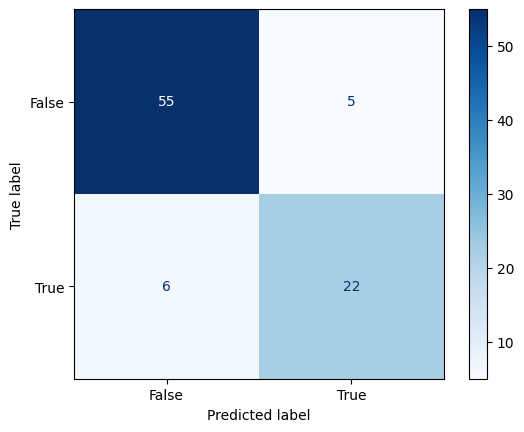

In [49]:
# with bert-v2
fivefolds_bert_v2_15k = pd.read_csv('bert-v2-15k.csv')
fivefolds_bert_v2_15k['result'] = np.where(fivefolds_bert_v2_15k['hyps'] >= 0.5,1,0)
fivefolds_bert_v2_15k_wrong = fivefolds_bert_v2_15k.iloc[np.where(fivefolds_bert_v2_15k['ifcorrect'] == False)]
print(fivefolds_bert_v2_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v2_15k_result = fivefolds_bert_v2_15k['result'].tolist()
fivefolds_bert_v2_15k_hyps = fivefolds_bert_v2_15k['hyps'].tolist()
fivefolds_bert_v2_15k_truth = [int(i) for i in fivefolds_bert_v2_15k['truth'].tolist()]
print(classification_report(fivefolds_bert_v2_15k_truth, fivefolds_bert_v2_15k_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v2_15k_truth, fivefolds_bert_v2_15k_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_truth), np.array(fivefolds_bert_v2_15k_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_bert_v2_15k_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v2_15k_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [50]:
# # with bert-v3-mean6
# fivefolds_bert_v3_15k_mean6 = pd.read_csv('bert-v3-15k-mean6.csv')
# fivefolds_bert_v3_15k_mean6['result'] = np.where(fivefolds_bert_v3_15k_mean6['hyps'] >= 0.5,1,0)
# fivefolds_bert_v3_15k_mean6_wrong = fivefolds_bert_v3_15k_mean6.iloc[np.where(fivefolds_bert_v3_15k_mean6['ifcorrect'] == False)]
# print(fivefolds_bert_v3_15k_mean6_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
# fivefolds_bert_v3_15k_mean6_result = fivefolds_bert_v3_15k_mean6['result'].tolist()
# fivefolds_bert_v3_15k_mean6_hyps = fivefolds_bert_v3_15k_mean6['hyps'].tolist()
# fivefolds_bert_v3_15k_mean6_truth = [int(i) for i in fivefolds_bert_v3_15k_mean6['truth'].tolist()]
# print(classification_report(fivefolds_bert_v3_15k_mean6_truth, fivefolds_bert_v3_15k_mean6_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v3_15k_mean6_truth, fivefolds_bert_v3_15k_mean6_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean6_truth), np.array(fivefolds_bert_v3_15k_mean6_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_bert_v3_15k_mean6_truth]
# y_pred = [bool(int(x)) for x in fivefolds_bert_v3_15k_mean6_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.913445    0.0      False       1
2     19  0.676430    0.0      False       1
5     33  0.854798    0.0      False       1
7     35  0.116426    1.0      False       0
10    51  0.862900    0.0      False       1
16    85  0.821065    0.0      False       1
41    32  0.284193    1.0      False       0
45    52  0.714128    0.0      False       1
46    57  0.147721    1.0      False       0
47    58  0.475172    1.0      False       0
49    81  0.650686    0.0      False       1
62    63  0.437246    1.0      False       0
71    10  0.428490    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.90      0.88      0.89        60
     patient       0.76      0.79      0.77        28

    accuracy                           0.85        88
   macro avg       0.83      0.83      0.83        88
weighted avg       0.85      0.85      0.85        88

sensitivuty:  0.7857142857142857
specificit

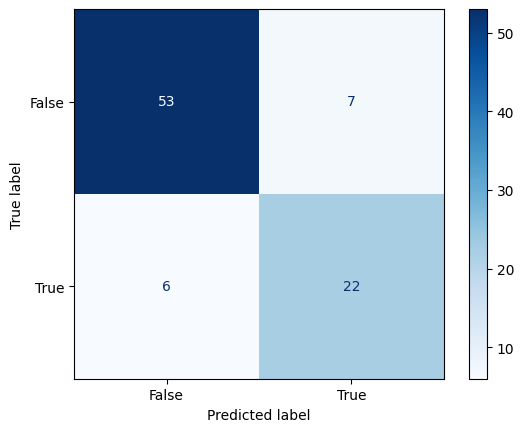

In [51]:
# with bert-v3-mean4
fivefolds_bert_v3_15k_mean4 = pd.read_csv('bert-v3-15k-mean4.csv')
fivefolds_bert_v3_15k_mean4['result'] = np.where(fivefolds_bert_v3_15k_mean4['hyps'] >= 0.5,1,0)
fivefolds_bert_v3_15k_mean4_wrong = fivefolds_bert_v3_15k_mean4.iloc[np.where(fivefolds_bert_v3_15k_mean4['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_mean4_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v3_15k_mean4_result = fivefolds_bert_v3_15k_mean4['result'].tolist()
fivefolds_bert_v3_15k_mean4_hyps = fivefolds_bert_v3_15k_mean4['hyps'].tolist()
fivefolds_bert_v3_15k_mean4_truth = [int(i) for i in fivefolds_bert_v3_15k_mean4['truth'].tolist()]
print(classification_report(fivefolds_bert_v3_15k_mean4_truth, fivefolds_bert_v3_15k_mean4_result, target_names=target_names))

tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v3_15k_mean4_truth, fivefolds_bert_v3_15k_mean4_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean4_truth), np.array(fivefolds_bert_v3_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean4_truth[0:19]), np.array(fivefolds_bert_v3_15k_mean4_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean4_truth[19:37]), np.array(fivefolds_bert_v3_15k_mean4_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean4_truth[37:54]), np.array(fivefolds_bert_v3_15k_mean4_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean4_truth[54:71]), np.array(fivefolds_bert_v3_15k_mean4_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean4_truth[71:88]), np.array(fivefolds_bert_v3_15k_mean4_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in fivefolds_bert_v3_15k_mean4_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v3_15k_mean4_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.974592    0.0      False       1
2     19  0.531534    0.0      False       1
3     22  0.713972    0.0      False       1
5     33  0.914992    0.0      False       1
7     35  0.173616    1.0      False       0
8     40  0.186704    1.0      False       0
10    51  0.917398    0.0      False       1
16    85  0.927687    0.0      False       1
41    32  0.418049    1.0      False       0
42    38  0.441249    1.0      False       0
46    57  0.140893    1.0      False       0
49    81  0.694261    0.0      False       1
62    63  0.479589    1.0      False       0
66    88  0.783036    0.0      False       1
71    10  0.386653    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.88      0.87      0.87        60
     patient       0.72      0.75      0.74        28

    accuracy                           0.83        88
   macro avg       0.80      0.81      0.81        88
weighted

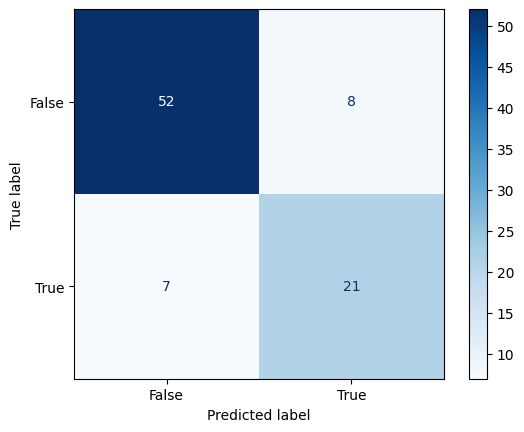

In [52]:
# with bert-v3
fivefolds_bert_v3_15k = pd.read_csv('bert-v3-15k.csv')
fivefolds_bert_v3_15k['result'] = np.where(fivefolds_bert_v3_15k['hyps'] >= 0.5,1,0)
fivefolds_bert_v3_15k_wrong = fivefolds_bert_v3_15k.iloc[np.where(fivefolds_bert_v3_15k['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v3_15k_result = fivefolds_bert_v3_15k['result'].tolist()
fivefolds_bert_v3_15k_hyps = fivefolds_bert_v3_15k['hyps'].tolist()
fivefolds_bert_v3_15k_truth = [int(i) for i in fivefolds_bert_v3_15k['truth'].tolist()]
print(classification_report(fivefolds_bert_v3_15k_truth, fivefolds_bert_v3_15k_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v3_15k_truth, fivefolds_bert_v3_15k_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_truth), np.array(fivefolds_bert_v3_15k_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_bert_v3_15k_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v3_15k_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

## ori

In [53]:
# inval = ['17CTT', '45CTT', '31CTT', '11CTT']
# for i in inval:
#     print(fivefolds_8k_1VGG_4LSTM.loc[lambda df: df['name'] == i ])

In [54]:
# inval_idx = [90,84,57,96]
# print(fivefolds_8k_1VGG_4LSTM.iloc[inval_idx])
# print(fivefolds_7k_1VGG_4LSTM.iloc[inval_idx])
# print(fivefolds_11k4lstm.iloc[inval_idx])
# print(fivefolds_10k4lstm.iloc[inval_idx])
# print(fivefolds_9k4lstm.iloc[inval_idx])
# print(fivefolds_8k4lstm.iloc[inval_idx])
# print(fivefolds_7k4lstm.iloc[inval_idx])

In [55]:
# best_acc = 0
# best_auc = 0
# best_acc_file = ''
# best_auc_file = ''
# for i in range(7, 13):
#     if i == 11:
#         continue
#     fivefolds_12knew_4LSTM = pd.read_csv(f'5folds{i}knew_4LSTM.csv')
#     print(f'5folds{i}knew_4LSTM.csv')
#     fivefolds_12knew_4LSTM['result'] = np.where(fivefolds_10knew_4LSTM['hyps'] >= 0.5,1,0)
#     #print(fivefolds_12knew_4LSTM.head(20))
#     fivefolds_16_result = fivefolds_12knew_4LSTM['result'].tolist()
#     fivefolds_16_hyps = fivefolds_12knew_4LSTM['hyps'].tolist()
#     fivefolds_16_truth = [int(i) for i in fivefolds_12knew_4LSTM['truth'].tolist()]
#     print(classification_report(fivefolds_16_truth, fivefolds_16_result, target_names=target_names))
#     tn, fp, fn, tp = confusion_matrix(fivefolds_16_truth, fivefolds_16_result).ravel()
#     print('sensitivuty: ',tp / (fn+tp))
#     print('specificity: ',tn / (fp+tn))
#     fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_16_truth), np.array(fivefolds_16_hyps), pos_label=1)
#     auc = metrics.auc(fpr, tpr)
#     print('AUC: ',auc)
#     if auc > best_auc:
#         best_auc = auc
#         best_auc_file = f'5folds{i}knew_4LSTM.csv'
#     acc = metrics.accuracy_score(fivefolds_16_truth, fivefolds_16_result)
#     print('acc: ',acc)
#     if acc > best_acc:
#         best_acc = acc
#         best_acc_file = f'5folds{i}knew_4LSTM.csv'
#     CI(np.array(fivefolds_16_truth).astype(int), np.array(fivefolds_16_hyps))
# print('best_acc', best_acc)
# print('best_acc_file', best_acc_file)
# print('best_auc', best_auc)
# print('best_auc_file', best_auc_file)


## combine

### 1, 2, 3

        hyps  truth  result  ifcorrect
0   0.510252      0       1      False
2   0.868445      0       1      False
5   0.795435      0       1      False
7   0.238627      1       0      False
10  0.729353      0       1      False
22  0.457834      1       0      False
24  0.338147      1       0      False
37  0.378962      1       0      False
41  0.290576      1       0      False
42  0.345496      1       0      False
45  0.624165      0       1      False
46  0.137762      1       0      False
62  0.439458      1       0      False
71  0.380982      1       0      False
79  0.477314      1       0      False
              precision    recall  f1-score   support

 non-patient       0.85      0.92      0.88        60
     patient       0.78      0.64      0.71        28

    accuracy                           0.83        88
   macro avg       0.81      0.78      0.79        88
weighted avg       0.83      0.83      0.82        88

sensitivuty:  0.6428571428571429
specificity:  0.

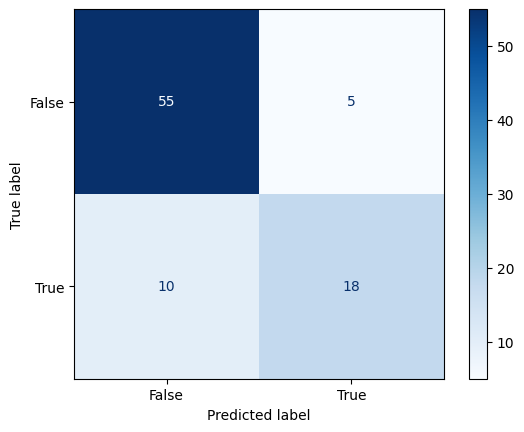

In [56]:
# for 1, 2, 3
whisper_v2_15k = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_2.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-mean4.csv')
llama_v2 = pd.read_csv('llama-v2.csv')

w_w = 0.74
b_w = 0.87
l_w = 0.80
weighted = w_w + b_w + l_w
combine = pd.DataFrame()
# combine['hyps'] = whisper_v2_15k['hyps']*w_w/weighted + bert_v2_15k['hyps']*b_w/weighted + llama_v2['hyps']*l_w/weighted
combine['hyps'] = (whisper_v2_15k['hyps'] + bert_v2_15k['hyps'] + llama_v2['hyps']) / 3
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [57]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

test_1 = combine_hyps[0:19]
test_2 = combine_hyps[19:37]
test_3 = combine_hyps[37:54]
test_4 = combine_hyps[54:71]
test_5 = combine_hyps[71:88]

train_1 = combine_hyps[19:88]
train_2 = combine_hyps[0:19] + combine_hyps[37:88]
train_3 = combine_hyps[0:37] + combine_hyps[54:88]
train_4 = combine_hyps[0:54] + combine_hyps[71:88]
train_5 = combine_hyps[0:19]

idx = [0, 19, 37, 54, 71, 88]

for i in range(5):
    svc = SVC(kernel='linear', probability=True, random_state=0)
    clf = make_pipeline(StandardScaler(), svc)
    # Fit the model to the data

    train = np.array(combine_hyps[0:idx[i]]+combine_hyps[idx[i+1]:88]).reshape(-1, 1)
    t_tra = np.array(combine_result[0:idx[i]]+combine_result[idx[i+1]:88]).reshape(-1, 1)
    valid = np.array(combine_hyps[idx[i]:idx[i+1]]).reshape(-1, 1)
    t_val = np.array(combine_result[idx[i]:idx[i+1]]).reshape(-1, 1)
    # print(train.shape, valid.shape)

    clf.fit(train, t_tra.ravel())
    # print(train, t_tra)
    #         print(reg.coef_)
    y_predicted = clf.predict(train)
    #         loss = mean_squared_error(t_tra, y_predicted)
    y_predicted_val = clf.predict(valid)
    y_predicted_val_pro = clf.predict_proba(valid)
    y_predicted_val_pro = [row[1] for row in y_predicted_val_pro]

    if  i == 0:
        new_pre = y_predicted_val
        new_pre_hys = y_predicted_val_pro
    else:
        new_pre = np.concatenate((new_pre, y_predicted_val))
        new_pre_hys = np.concatenate((new_pre_hys, y_predicted_val_pro))
    
# new_pre = new_pre.reshape(-1, 1)
# print(new_pre.shape, new_pre_hys.shape)

new_df = pd.DataFrame(new_pre, columns=['new_pre'])
new_h_df = pd.DataFrame(new_pre_hys, columns=['new_hyps'])
combine = pd.concat([combine, new_df, new_h_df], axis=1)
combine.to_csv(f'combine-v2.csv', index=False) 
print(combine)

        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.510252      0       1      False        1  0.633003
1   0.783190      1       1       True        1  0.995939
2   0.868445      0       1      False        1  0.999998
3   0.223576      0       0       True        0  0.009237
4   0.705780      1       1       True        1  0.983591
..       ...    ...     ...        ...      ...       ...
83  0.125306      0       0       True        0  0.002108
84  0.097957      0       0       True        0  0.001278
85  0.219114      0       0       True        0  0.011737
86  0.219115      0       0       True        0  0.011737
87  0.132239      0       0       True        0  0.002393

[88 rows x 6 columns]


        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.510252      0       1      False        1  0.633003
2   0.868445      0       1      False        1  0.999998
5   0.795435      0       1      False        1  0.996748
7   0.238627      1       0      False        0  0.012144
10  0.729353      0       1      False        1  0.989253
22  0.457834      1       0      False        0  0.383332
24  0.338147      1       0      False        0  0.066912
37  0.378962      1       0      False        0  0.123158
41  0.290576      1       0      False        0  0.031072
42  0.345496      1       0      False        0  0.073622
45  0.624165      0       1      False        1  0.901268
46  0.137762      1       0      False        0  0.002317
62  0.439458      1       0      False        0  0.301238
71  0.380982      1       0      False        0  0.185353
79  0.477314      1       1      False        1  0.570587
              precision    recall  f1-score   support

 non-patient     

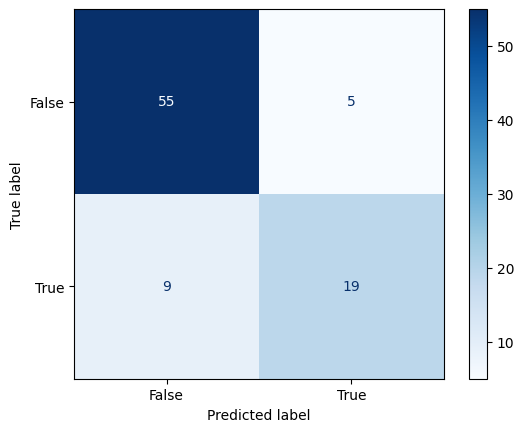

In [58]:
# combine_v2
combine_v2 = pd.read_csv('combine-v2.csv')
combine_v2['result'] = combine_v2['new_pre']
fivefolds_bert_v3_15k_wrong = combine_v2.iloc[np.where(combine_v2['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
combine_v2_result = combine_v2['result'].tolist()
combine_v2_hyps = combine_v2['new_hyps'].tolist()
combine_v2_truth = [int(i) for i in combine_v2['truth'].tolist()]
print(classification_report(combine_v2_truth, combine_v2_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_v2_truth, combine_v2_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr, tpr, thresholds = metrics.roc_curve(np.array(combine_v2_truth), np.array(combine_v2_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_v2_truth[0:19]), np.array(combine_v2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_v2_truth[19:37]), np.array(combine_v2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_v2_truth[37:54]), np.array(combine_v2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_v2_truth[54:71]), np.array(combine_v2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_v2_truth[71:88]), np.array(combine_v2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_v2_truth]
y_pred = [bool(int(x)) for x in combine_v2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### 1, 2

        hyps  truth  result  ifcorrect
0   0.525503      0       1      False
2   0.831158      0       1      False
5   0.912177      0       1      False
7   0.186084      1       0      False
10  0.737676      0       1      False
22  0.436752      1       0      False
24  0.437727      1       0      False
41  0.309832      1       0      False
42  0.376846      1       0      False
45  0.575882      0       1      False
46  0.080612      1       0      False
71  0.399034      1       0      False
              precision    recall  f1-score   support

 non-patient       0.89      0.92      0.90        60
     patient       0.81      0.75      0.78        28

    accuracy                           0.86        88
   macro avg       0.85      0.83      0.84        88
weighted avg       0.86      0.86      0.86        88

sensitivuty:  0.75
specificity:  0.9166666666666666
AUC:  0.7666666666666666 1.0 0.8939393939393939 1.0 1.0
AUC_avg:  0.932121212121212


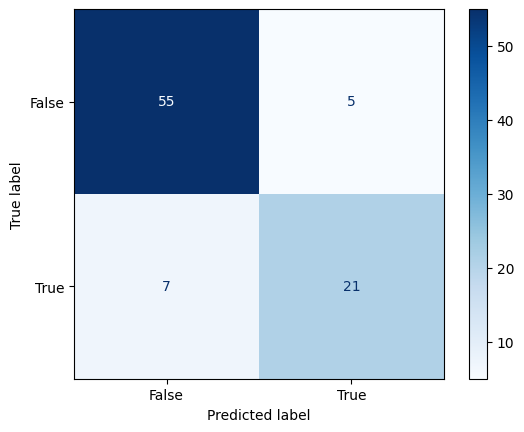

In [59]:
# for 1, 2
whisper_v2_15k = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_2.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-mean4.csv')
llama_v2 = pd.read_csv('llama-v2.csv')

w_w = 0.74
b_w = 0.87
l_w = 0.80
weighted = w_w + b_w 
combine = pd.DataFrame()
# combine['hyps'] = whisper_v2_15k['hyps']*w_w/weighted + bert_v2_15k['hyps']*b_w/weighted
combine['hyps'] = (whisper_v2_15k['hyps'] + bert_v2_15k['hyps']) / 2
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [60]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

test_1 = combine_hyps[0:19]
test_2 = combine_hyps[19:37]
test_3 = combine_hyps[37:54]
test_4 = combine_hyps[54:71]
test_5 = combine_hyps[71:88]

train_1 = combine_hyps[19:88]
train_2 = combine_hyps[0:19] + combine_hyps[37:88]
train_3 = combine_hyps[0:37] + combine_hyps[54:88]
train_4 = combine_hyps[0:54] + combine_hyps[71:88]
train_5 = combine_hyps[0:19]

idx = [0, 19, 37, 54, 71, 88]

for i in range(5):
    svc = SVC(kernel='linear', probability=True, random_state=0)
    clf = make_pipeline(StandardScaler(), svc)
    # Fit the model to the data

    train = np.array(combine_hyps[0:idx[i]]+combine_hyps[idx[i+1]:88]).reshape(-1, 1)
    t_tra = np.array(combine_result[0:idx[i]]+combine_result[idx[i+1]:88]).reshape(-1, 1)
    valid = np.array(combine_hyps[idx[i]:idx[i+1]]).reshape(-1, 1)
    t_val = np.array(combine_result[idx[i]:idx[i+1]]).reshape(-1, 1)
    # print(train.shape, valid.shape)

    clf.fit(train, t_tra.ravel())
    # print(train, t_tra)
    #         print(reg.coef_)
    y_predicted = clf.predict(train)
    #         loss = mean_squared_error(t_tra, y_predicted)
    y_predicted_val = clf.predict(valid)
    y_predicted_val_pro = clf.predict_proba(valid)
    y_predicted_val_pro = [row[1] for row in y_predicted_val_pro]

    if  i == 0:
        new_pre = y_predicted_val
        new_pre_hys = y_predicted_val_pro
    else:
        new_pre = np.concatenate((new_pre, y_predicted_val))
        new_pre_hys = np.concatenate((new_pre_hys, y_predicted_val_pro))
    
# new_pre = new_pre.reshape(-1, 1)
# print(new_pre.shape, new_pre_hys.shape)

new_df = pd.DataFrame(new_pre, columns=['new_pre'])
new_h_df = pd.DataFrame(new_pre_hys, columns=['new_hyps'])
combine = pd.concat([combine, new_df, new_h_df], axis=1)
combine.to_csv(f'combine-v2.csv', index=False) 
print(combine)

        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.525503      0       1      False        1  0.645020
1   0.914368      1       1       True        1  0.999984
2   0.831158      0       1      False        1  0.992673
3   0.286635      0       0       True        0  0.061465
4   0.808670      1       1       True        1  0.989966
..       ...    ...     ...        ...      ...       ...
83  0.043454      0       0       True        0  0.003164
84  0.056675      0       0       True        0  0.003783
85  0.211641      0       0       True        0  0.030547
86  0.175692      0       0       True        0  0.018848
87  0.111195      0       0       True        0  0.007898

[88 rows x 6 columns]


        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.525503      0       1      False        1  0.645020
2   0.831158      0       1      False        1  0.992673
5   0.912177      0       1      False        1  0.999983
7   0.186084      1       0      False        0  0.015119
10  0.737676      0       1      False        1  0.973161
22  0.436752      1       0      False        0  0.388217
24  0.437727      1       0      False        0  0.391224
41  0.309832      1       0      False        0  0.099372
42  0.376846      1       0      False        0  0.204922
45  0.575882      0       1      False        1  0.762064
46  0.080612      1       0      False        0  0.006058
71  0.399034      1       0      False        0  0.278291
              precision    recall  f1-score   support

 non-patient       0.89      0.92      0.90        60
     patient       0.81      0.75      0.78        28

    accuracy                           0.86        88
   macro avg       0.85     

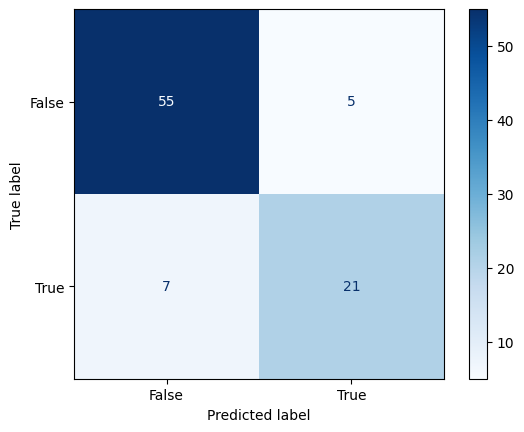

In [61]:
# combine_v2
combine_v2 = pd.read_csv('combine-v2.csv')
combine_v2['result'] = combine_v2['new_pre']
fivefolds_bert_v3_15k_wrong = combine_v2.iloc[np.where(combine_v2['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
combine_v2_result = combine_v2['result'].tolist()
combine_v2_hyps = combine_v2['new_hyps'].tolist()
combine_v2_truth = [int(i) for i in combine_v2['truth'].tolist()]
print(classification_report(combine_v2_truth, combine_v2_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_v2_truth, combine_v2_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr, tpr, thresholds = metrics.roc_curve(np.array(combine_v2_truth), np.array(combine_v2_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_v2_truth[0:19]), np.array(combine_v2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_v2_truth[19:37]), np.array(combine_v2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_v2_truth[37:54]), np.array(combine_v2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_v2_truth[54:71]), np.array(combine_v2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_v2_truth[71:88]), np.array(combine_v2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_v2_truth]
y_pred = [bool(int(x)) for x in combine_v2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### 2, 3

        hyps  truth  result  ifcorrect
0   0.629925      0       1      False
2   0.923303      0       1      False
5   0.769516      0       1      False
7   0.226393      1       0      False
10  0.792338      0       1      False
24  0.464870      1       0      False
37  0.465854      1       0      False
41  0.365116      1       0      False
42  0.349555      1       0      False
45  0.727583      0       1      False
46  0.168171      1       0      False
47  0.491987      1       0      False
62  0.451067      1       0      False
71  0.397729      1       0      False
              precision    recall  f1-score   support

 non-patient       0.86      0.92      0.89        60
     patient       0.79      0.68      0.73        28

    accuracy                           0.84        88
   macro avg       0.83      0.80      0.81        88
weighted avg       0.84      0.84      0.84        88

sensitivuty:  0.6785714285714286
specificity:  0.9166666666666666
AUC:  0.71666666666666

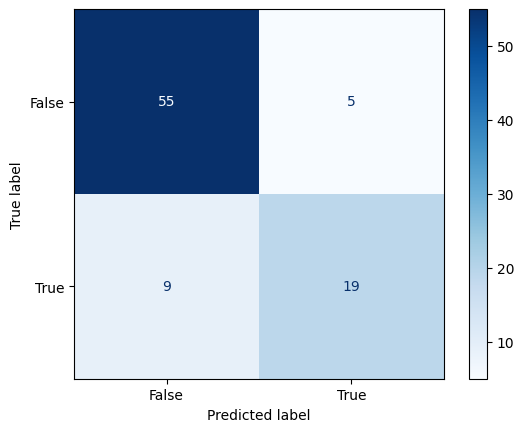

In [62]:
# for 2, 3
whisper_v2_15k = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_2.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-mean4.csv')
llama_v2 = pd.read_csv('llama-v2.csv')

w_w = 0.74
b_w = 0.87
l_w = 0.80
weighted = b_w + l_w
combine = pd.DataFrame()
# combine['hyps'] = bert_v2_15k['hyps']*b_w/weighted + llama_v2['hyps']*l_w/weighted
combine['hyps'] = (bert_v2_15k['hyps'] + llama_v2['hyps']) / 2
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [63]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

test_1 = combine_hyps[0:19]
test_2 = combine_hyps[19:37]
test_3 = combine_hyps[37:54]
test_4 = combine_hyps[54:71]
test_5 = combine_hyps[71:88]

train_1 = combine_hyps[19:88]
train_2 = combine_hyps[0:19] + combine_hyps[37:88]
train_3 = combine_hyps[0:37] + combine_hyps[54:88]
train_4 = combine_hyps[0:54] + combine_hyps[71:88]
train_5 = combine_hyps[0:19]

idx = [0, 19, 37, 54, 71, 88]

for i in range(5):
    svc = SVC(kernel='linear', probability=True, random_state=0)
    clf = make_pipeline(StandardScaler(), svc)
    # Fit the model to the data

    train = np.array(combine_hyps[0:idx[i]]+combine_hyps[idx[i+1]:88]).reshape(-1, 1)
    t_tra = np.array(combine_result[0:idx[i]]+combine_result[idx[i+1]:88]).reshape(-1, 1)
    valid = np.array(combine_hyps[idx[i]:idx[i+1]]).reshape(-1, 1)
    t_val = np.array(combine_result[idx[i]:idx[i+1]]).reshape(-1, 1)
    # print(train.shape, valid.shape)

    clf.fit(train, t_tra.ravel())
    # print(train, t_tra)
    #         print(reg.coef_)
    y_predicted = clf.predict(train)
    #         loss = mean_squared_error(t_tra, y_predicted)
    y_predicted_val = clf.predict(valid)
    y_predicted_val_pro = clf.predict_proba(valid)
    y_predicted_val_pro = [row[1] for row in y_predicted_val_pro]

    if  i == 0:
        new_pre = y_predicted_val
        new_pre_hys = y_predicted_val_pro
    else:
        new_pre = np.concatenate((new_pre, y_predicted_val))
        new_pre_hys = np.concatenate((new_pre_hys, y_predicted_val_pro))
    
# new_pre = new_pre.reshape(-1, 1)
# print(new_pre.shape, new_pre_hys.shape)

new_df = pd.DataFrame(new_pre, columns=['new_pre'])
new_h_df = pd.DataFrame(new_pre_hys, columns=['new_hyps'])
combine = pd.concat([combine, new_df, new_h_df], axis=1)
combine.to_csv(f'combine-v2.csv', index=False) 
print(combine)

        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.629925      0       1      False        1  0.887720
1   0.729365      1       1       True        1  0.974890
2   0.923303      0       1      False        1  0.999996
3   0.184282      0       0       True        0  0.006276
4   0.696518      1       1       True        1  0.958255
..       ...    ...     ...        ...      ...       ...
83  0.164282      0       0       True        0  0.004484
84  0.102525      0       0       True        0  0.001731
85  0.144465      0       0       True        0  0.003304
86  0.178538      0       0       True        0  0.005585
87  0.099069      0       0       True        0  0.001641

[88 rows x 6 columns]


        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.629925      0       1      False        1  0.887720
2   0.923303      0       1      False        1  0.999996
5   0.769516      0       1      False        1  0.986637
7   0.226393      1       0      False        0  0.012312
10  0.792338      0       1      False        1  0.990689
24  0.464870      1       0      False        0  0.355643
37  0.465854      1       0      False        0  0.422728
41  0.365116      1       0      False        0  0.109580
42  0.349555      1       0      False        0  0.085458
45  0.727583      0       1      False        1  0.986859
46  0.168171      1       0      False        0  0.003773
47  0.491987      1       1      False        1  0.537417
62  0.451067      1       0      False        0  0.284508
71  0.397729      1       0      False        0  0.140778
              precision    recall  f1-score   support

 non-patient       0.87      0.92      0.89        60
     patient       0.

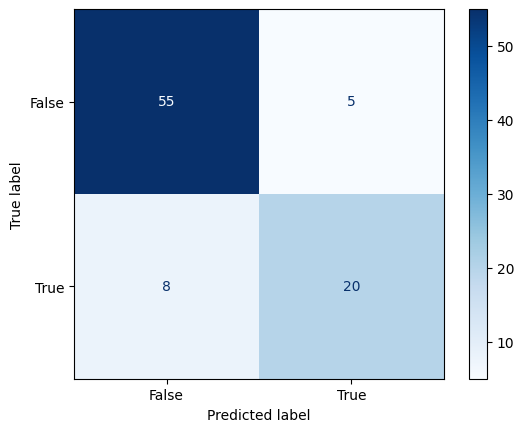

In [64]:
# combine_v2
combine_v2 = pd.read_csv('combine-v2.csv')
combine_v2['result'] = combine_v2['new_pre']
fivefolds_bert_v3_15k_wrong = combine_v2.iloc[np.where(combine_v2['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
combine_v2_result = combine_v2['result'].tolist()
combine_v2_hyps = combine_v2['new_hyps'].tolist()
combine_v2_truth = [int(i) for i in combine_v2['truth'].tolist()]
print(classification_report(combine_v2_truth, combine_v2_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_v2_truth, combine_v2_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr, tpr, thresholds = metrics.roc_curve(np.array(combine_v2_truth), np.array(combine_v2_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_v2_truth[0:19]), np.array(combine_v2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_v2_truth[19:37]), np.array(combine_v2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_v2_truth[37:54]), np.array(combine_v2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_v2_truth[54:71]), np.array(combine_v2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_v2_truth[71:88]), np.array(combine_v2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_v2_truth]
y_pred = [bool(int(x)) for x in combine_v2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### 1,3

        hyps  truth  result  ifcorrect
2   0.850875      0       1      False
5   0.704612      0       1      False
7   0.303405      1       0      False
8   0.452771      1       0      False
10  0.658045      0       1      False
16  0.554817      0       1      False
19  0.336585      1       0      False
20  0.450389      1       0      False
22  0.375024      1       0      False
23  0.467692      1       0      False
24  0.111843      1       0      False
25  0.407196      1       0      False
27  0.452958      1       0      False
37  0.153153      1       0      False
39  0.315608      1       0      False
41  0.196779      1       0      False
42  0.310086      1       0      False
45  0.569031      0       1      False
46  0.164504      1       0      False
55  0.432139      1       0      False
62  0.347794      1       0      False
70  0.291589      1       0      False
71  0.346183      1       0      False
75  0.468244      1       0      False
79  0.310461      1      

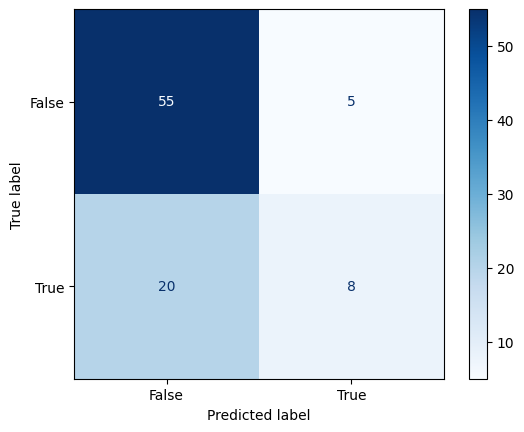

In [65]:
# for 1, 3
whisper_v2_15k = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_2.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-mean4.csv')
llama_v2 = pd.read_csv('llama-v2.csv')

w_w = 0.74
b_w = 0.87
l_w = 0.80
weighted = w_w + l_w
combine = pd.DataFrame()
# combine['hyps'] = whisper_v2_15k['hyps']*w_w/weighted + llama_v2['hyps']*l_w/weighted
combine['hyps'] = (whisper_v2_15k['hyps'] + llama_v2['hyps']) / 2
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [66]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

test_1 = combine_hyps[0:19]
test_2 = combine_hyps[19:37]
test_3 = combine_hyps[37:54]
test_4 = combine_hyps[54:71]
test_5 = combine_hyps[71:88]

train_1 = combine_hyps[19:88]
train_2 = combine_hyps[0:19] + combine_hyps[37:88]
train_3 = combine_hyps[0:37] + combine_hyps[54:88]
train_4 = combine_hyps[0:54] + combine_hyps[71:88]
train_5 = combine_hyps[0:19]

idx = [0, 19, 37, 54, 71, 88]

for i in range(5):
    svc = SVC(kernel='linear', probability=True, random_state=0)
    clf = make_pipeline(StandardScaler(), svc)
    # Fit the model to the data

    train = np.array(combine_hyps[0:idx[i]]+combine_hyps[idx[i+1]:88]).reshape(-1, 1)
    t_tra = np.array(combine_result[0:idx[i]]+combine_result[idx[i+1]:88]).reshape(-1, 1)
    valid = np.array(combine_hyps[idx[i]:idx[i+1]]).reshape(-1, 1)
    t_val = np.array(combine_result[idx[i]:idx[i+1]]).reshape(-1, 1)
    # print(train.shape, valid.shape)

    clf.fit(train, t_tra.ravel())
    # print(train, t_tra)
    #         print(reg.coef_)
    y_predicted = clf.predict(train)
    #         loss = mean_squared_error(t_tra, y_predicted)
    y_predicted_val = clf.predict(valid)
    y_predicted_val_pro = clf.predict_proba(valid)
    y_predicted_val_pro = [row[1] for row in y_predicted_val_pro]

    if  i == 0:
        new_pre = y_predicted_val
        new_pre_hys = y_predicted_val_pro
    else:
        new_pre = np.concatenate((new_pre, y_predicted_val))
        new_pre_hys = np.concatenate((new_pre_hys, y_predicted_val_pro))
    
# new_pre = new_pre.reshape(-1, 1)
# print(new_pre.shape, new_pre_hys.shape)

new_df = pd.DataFrame(new_pre, columns=['new_pre'])
new_h_df = pd.DataFrame(new_pre_hys, columns=['new_hyps'])
combine = pd.concat([combine, new_df, new_h_df], axis=1)
combine.to_csv(f'combine-v2.csv', index=False) 
print(combine)

        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.375327      0       0       True        0  0.039765
1   0.705836      1       1       True        1  0.981138
2   0.850875      0       1      False        1  0.999998
3   0.199811      0       0       True        0  0.000890
4   0.612151      1       1       True        1  0.872203
..       ...    ...     ...        ...      ...       ...
83  0.168183      0       0       True        0  0.001271
84  0.134672      0       0       True        0  0.000690
85  0.301238      0       0       True        0  0.014349
86  0.303115      0       0       True        0  0.014847
87  0.186454      0       0       True        0  0.001773

[88 rows x 6 columns]


        hyps  truth  result  ifcorrect  new_pre  new_hyps
2   0.850875      0       1      False        1  0.999998
5   0.704612      0       1      False        1  0.980640
7   0.303405      1       0      False        0  0.008415
8   0.452771      1       0      False        0  0.176873
10  0.658045      0       1      False        1  0.948628
16  0.554817      0       1      False        1  0.662773
19  0.336585      1       0      False        0  0.028302
20  0.450389      1       0      False        0  0.216982
22  0.375024      1       0      False        0  0.060320
23  0.467692      1       0      False        0  0.281497
24  0.111843      1       0      False        0  0.000316
25  0.407196      1       0      False        0  0.104535
27  0.452958      1       0      False        0  0.225845
37  0.153153      1       0      False        0  0.001000
39  0.315608      1       0      False        0  0.018868
41  0.196779      1       0      False        0  0.002202
42  0.310086  

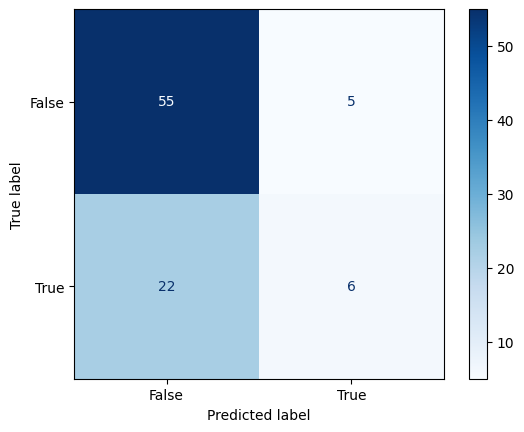

In [67]:
# combine_v2
combine_v2 = pd.read_csv('combine-v2.csv')
combine_v2['result'] = combine_v2['new_pre']
fivefolds_bert_v3_15k_wrong = combine_v2.iloc[np.where(combine_v2['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
combine_v2_result = combine_v2['result'].tolist()
combine_v2_hyps = combine_v2['new_hyps'].tolist()
combine_v2_truth = [int(i) for i in combine_v2['truth'].tolist()]
print(classification_report(combine_v2_truth, combine_v2_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_v2_truth, combine_v2_result).ravel()
print('sensitivuty: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr, tpr, thresholds = metrics.roc_curve(np.array(combine_v2_truth), np.array(combine_v2_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_v2_truth[0:19]), np.array(combine_v2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_v2_truth[19:37]), np.array(combine_v2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_v2_truth[37:54]), np.array(combine_v2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_v2_truth[54:71]), np.array(combine_v2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_v2_truth[71:88]), np.array(combine_v2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_v2_truth]
y_pred = [bool(int(x)) for x in combine_v2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [68]:
# whisper_WhisperForAudioClassification_v3 = pd.read_csv('whisper-WhisperForAudioClassification-v3-15k_2.csv')
# whisper_v3_15k_with_id = pd.read_csv('whisper-v3-15k_with_id_2.csv')

# combine = pd.DataFrame()
# combine['hyps'] = (whisper_WhisperForAudioClassification_v3['hyps'] + whisper_v3_15k_with_id['hyps']) / 2
# combine['truth'] = whisper_WhisperForAudioClassification_v3['truth'].astype(int)
# combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
# combine['ifcorrect'] = combine['result'] == combine['truth']
# # combine
# combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
# print(combine_wrong)
# # print(fivefolds_with10separate_10k.head(20))
# combine_result = combine['result'].tolist()
# combine_hyps = combine['hyps'].tolist()
# combine_truth = [int(i) for i in combine['truth'].tolist()]
# print(classification_report(combine_truth, combine_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(combine_truth), np.array(combine_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))